In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # used as imputer 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# create ProgressBar
from tqdm import tqdm

from sklearn import set_config
warnings.filterwarnings(action="ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)
set_config(display="diagram")
sns.set_style(style="darkgrid")

%matplotlib inline

In [2]:
df: DataFrame = pd.read_csv(filepath_or_buffer=r"D:\Python\data analysis projects\titanic\titanic.csv")
df.dropna(axis=0, how="all", inplace=True)
df1 = df.copy()

In [3]:
df.dropna(subset="embarked", inplace=True)
df["fare"].fillna(value=df["fare"].mean(), axis=0, inplace=True)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [4]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# handling missing data for age before creating segmentation for each age
random_forest_imputer = IterativeImputer(
    estimator=RandomForestRegressor(
        bootstrap=True,
        n_jobs=-1,
        n_estimators=100,
        random_state=42
    ),missing_values=np.nan
)

df["age"] = random_forest_imputer.fit_transform(X=df[["age"]])
df["age"] = np.round(a=df["age"], decimals=2)

<Axes: >

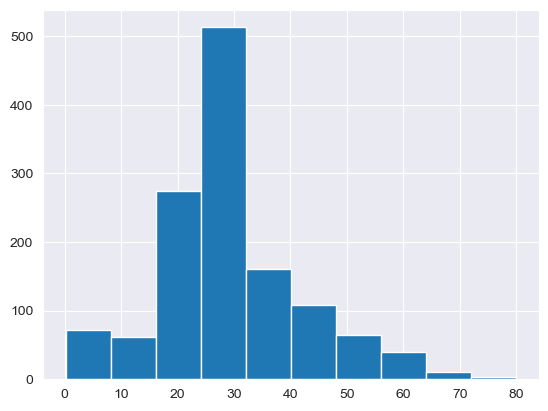

In [5]:
df["age"].hist()

In [6]:
bins: list[int] = [0,2,5,10,14,17,30,60,80]
labels: list[str] = ["Infant", "Toddler", "Young Child", "Older Child", "Teen Age", "Young Adult","Adult", "Elderly"]

df["age_category"] = pd.cut(x=df["age"], bins=bins, labels=labels)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_category
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.00,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Young Adult
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.92,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Infant
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.00,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Infant
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Young Adult
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.50,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN,Teen Age
1305,3.0,0.0,"Zabour, Miss. Thamine",female,29.84,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN,Young Adult
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.50,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN,Young Adult
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.00,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN,Young Adult


<Axes: ylabel='age_category'>

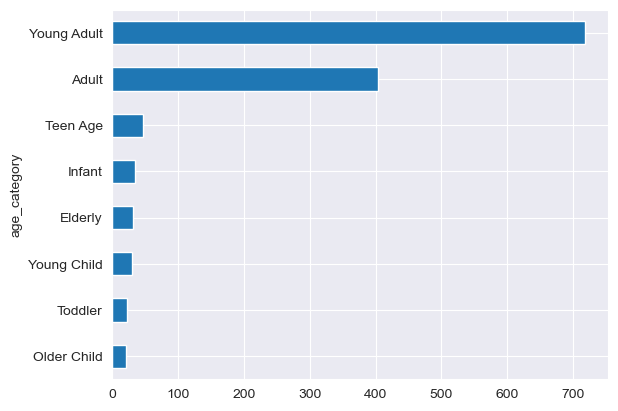

In [25]:
df["age_category"].value_counts(ascending=True).plot(kind="barh")

In [8]:
df["survived"].value_counts()

survived
0.0    809
1.0    498
Name: count, dtype: int64

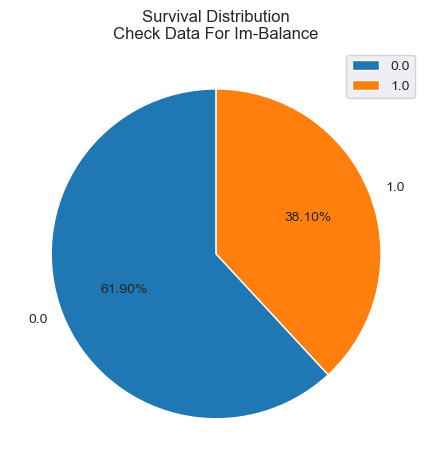

In [9]:
plt.pie(x=df["survived"].value_counts(), autopct="%.2f%%", startangle=90, labels=df["survived"].value_counts().index)
plt.title(label="survival distribution\ncheck data for im-balance".title())
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
df.drop(columns="cabin", inplace=True)

## no duplicate values in the dataset

In [11]:
df[df.duplicated()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,age_category


In [12]:
df.isna().sum()


pclass             0
survived           0
name               0
sex                0
age                0
sibsp              0
parch              0
ticket             0
fare               0
embarked           0
boat             823
body            1186
home.dest        563
age_category       0
dtype: int64

In [13]:
round(number=264 / 1309 , ndigits=2)

0.2

In [14]:
np.round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
pclass,1307.0,2.30,0.84,1.00,2.0,3.00,3.00,3.00
survived,1307.0,0.38,0.49,0.00,0.0,0.00,1.00,1.00
age,1307.0,29.84,12.86,0.17,22.0,29.84,35.00,80.00
sibsp,1307.0,0.50,1.04,0.00,0.0,0.00,1.00,8.00
parch,1307.0,0.39,0.87,0.00,0.0,0.00,0.00,9.00
fare,1307.0,33.22,51.75,0.00,7.9,14.45,31.28,512.33
body,121.0,160.81,97.70,1.00,72.0,155.00,256.00,328.00


In [15]:
df.describe().T.index

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body'], dtype='object')

In [16]:
df.drop(columns=['boat', 'body', 'home.dest'], inplace=True)

<Axes: >

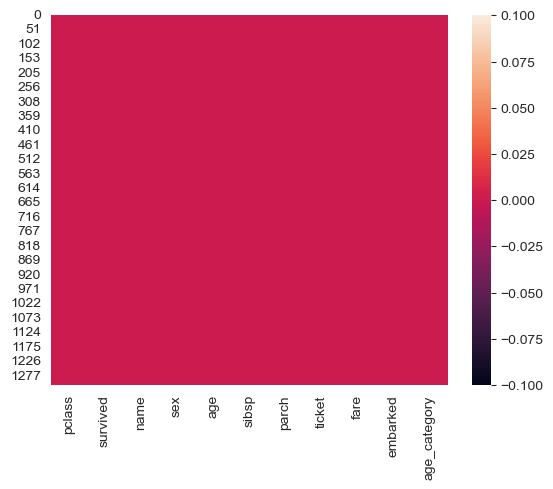

In [17]:
sns.heatmap(df.isna())

In [18]:
px.box(data_frame=df[['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare']], orientation="h")

## handle outlier using IQR

In [19]:
from typing import Tuple
def outlier_iqr(column: Series) -> Tuple[np.float64, np.float64]:
    Q1: np.float64 = np.round(a=np.percentile(a=column, q=25), decimals=2)
    Q3: np.float64 = np.round(a=np.percentile(a=column, q=75), decimals=2)
    IQR: np.float64 = Q3 - Q1
    
    upper_bound: np.float64 = Q3 + (1.5 * IQR)
    lower_bound: np.float64= Q1 - (1.5 * IQR)
    return upper_bound, lower_bound

upper, lower = outlier_iqr(column=df["fare"])
print(
    f"upper bound: {upper:.4f} and it's type: {type(upper)}\n\
lower bound: {lower:.4f} and it's type: {type(lower)}"
)

upper bound: 66.3500 and it's type: <class 'numpy.float64'>
lower bound: -27.1700 and it's type: <class 'numpy.float64'>


In [20]:
iqr_df: DataFrame = df.copy()
# iqr fare
upper_fare, lower_fare = outlier_iqr(column=iqr_df["fare"])
iqr_df = iqr_df[(iqr_df["fare"] > lower_fare) & (iqr_df["fare"] < upper_fare)]
iqr_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,age_category
5,1.0,1.0,"Anderson, Mr. Harry",male,48.00,0.0,0.0,19952,26.5500,S,Adult
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.00,0.0,0.0,112050,0.0000,S,Adult
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2.0,0.0,11769,51.4792,S,Adult
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.00,0.0,0.0,PC 17609,49.5042,C,Elderly
14,1.0,1.0,"Barkworth, Mr. Algernon Henry Wilson",male,80.00,0.0,0.0,27042,30.0000,S,Elderly
...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.50,1.0,0.0,2665,14.4542,C,Teen Age
1305,3.0,0.0,"Zabour, Miss. Thamine",female,29.84,1.0,0.0,2665,14.4542,C,Young Adult
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.50,0.0,0.0,2656,7.2250,C,Young Adult
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.00,0.0,0.0,2670,7.2250,C,Young Adult


In [21]:
px.box(data_frame=iqr_df[['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare']], orientation="h")

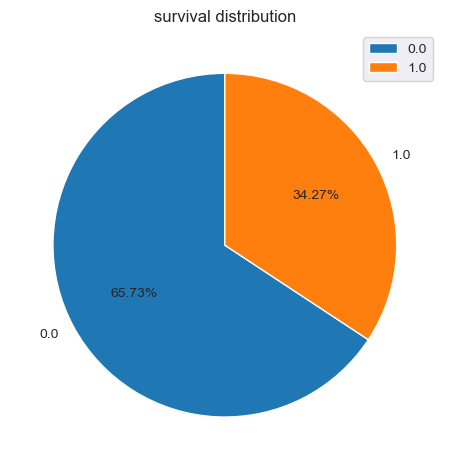

In [22]:
plt.pie(x=iqr_df["survived"].value_counts(), autopct="%.2f%%", startangle=90, labels=iqr_df["survived"].value_counts().index)
plt.title(label="survival distribution")
plt.legend()
plt.tight_layout()
plt.show()

## Z-score tot handle outliers

In [23]:
z_df: DataFrame = df.copy()
sns.histplot(data=z_df["fare"], bins=10, kde=True)
print(z_df["fare"].mean())
print(z_df["fare"].std())

# using the z score 
upper_limit = z_df["fare"].mean() + (3 * z_df["fare"].std())
lower_limit = z_df["fare"].mean() - (3 * z_df["fare"].std())
print(f"Z-score\nupper_limit: {upper_limit:.2f}\nlower_limit: {lower_limit:.2f}\n{"-" * 30}\nIQR\n\
upper bound: {upper_fare:.2f}\nlower bound: {lower_fare:.2f}")
z_df = z_df[(z_df["fare"] > lower_limit) & (z_df["fare"] < upper_limit)]
z_df

SyntaxError: f-string: expecting '}' (1232325075.py, line 9)

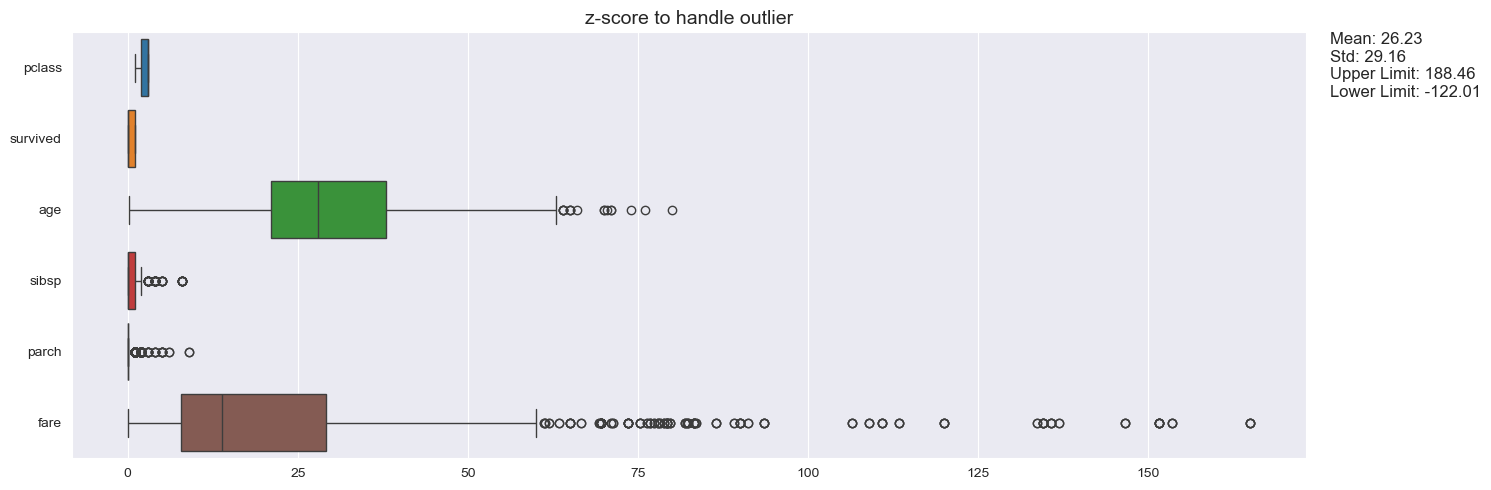

In [ ]:
# 
plt.figure(figsize=(15,5))
sns.boxplot(data=z_df[z_df.describe().T.index], orient="h")
plt.title(label="z-score to handle outlier", fontsize=14)

legend = {
    "mean" : z_df["fare"].mean(),
    "std" : z_df["fare"].std(),
    "upper limit" : upper_limit,
    "lower limit" : lower_limit
}
legend = {item.title() : f"{value:.2f}" for item, value in legend.items()}

# Use plt.text to display the legend on the plot
textstr = '\n'.join([f'{key}: {value}' for key, value in legend.items()])

# Position the text on the plot (adjust the coordinates as needed)
plt.text(x=1.02, y=1, s=textstr, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.tight_layout()
plt.show()


# Choosing IQR because its more stable than z-score 

## KNN IMputer to handle age missing data

In [ ]:
upper, lower = outlier_iqr(column=df["fare"])
df = df[(df["fare"] > lower) & (df["fare"] < upper)]
k = np.int64(np.ceil(np.sqrt(len(df["age"]))))

n_of_neighbors = k if k % 2 != 0 else k - 1
knn_imputer = KNNImputer(missing_values=np.nan, n_neighbors=n_of_neighbors, weights="distance", metric="nan_euclidean")

# convert age column from series 1D to data frame 2D
age_reshape = df[["age"]]

df["age"] = knn_imputer.fit_transform(X=age_reshape)

df = np.round(df, 2)
df


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
5,1.0,1.0,"Anderson, Mr. Harry",male,48.00,0.0,0.0,19952,26.55,S
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.00,0.0,0.0,112050,0.00,S
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2.0,0.0,11769,51.48,S
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.00,0.0,0.0,PC 17609,49.50,C
14,1.0,1.0,"Barkworth, Mr. Algernon Henry Wilson",male,80.00,0.0,0.0,27042,30.00,S
...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.50,1.0,0.0,2665,14.45,C
1305,3.0,0.0,"Zabour, Miss. Thamine",female,28.74,1.0,0.0,2665,14.45,C
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.50,0.0,0.0,2656,7.22,C
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.00,0.0,0.0,2670,7.22,C


In [ ]:
gender = pd.get_dummies(data=df["sex"]).astype(dtype=np.int64)
df = pd.concat(objs=[df.iloc[:,:4], gender, df.iloc[:,4:]], axis=1)

In [ ]:
emb = pd.get_dummies(df["embarked"], prefix="EMB_").astype(np.int64)
df = pd.concat(objs=[df, emb], axis=1)
df

,pclass,survived,name,sex,female,male,age,sibsp,parch,ticket,fare,embarked,EMB__C,EMB__Q,EMB__S
5,1.0,1.0,"Anderson, Mr. Harry",male,0,1,48.00,0.0,0.0,19952,26.55,S,0,0,1
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,0,1,39.00,0.0,0.0,112050,0.00,S,0,0,1
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,1,0,53.00,2.0,0.0,11769,51.48,S,0,0,1
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,0,1,71.00,0.0,0.0,PC 17609,49.50,C,1,0,0
14,1.0,1.0,"Barkworth, Mr. Algernon Henry Wilson",male,0,1,80.00,0.0,0.0,27042,30.00,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,1,0,14.50,1.0,0.0,2665,14.45,C,1,0,0
1305,3.0,0.0,"Zabour, Miss. Thamine",female,1,0,28.74,1.0,0.0,2665,14.45,C,1,0,0
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,0,1,26.50,0.0,0.0,2656,7.22,C,1,0,0
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,0,1,27.00,0.0,0.0,2670,7.22,C,1,0,0


## Exploratory data analysis

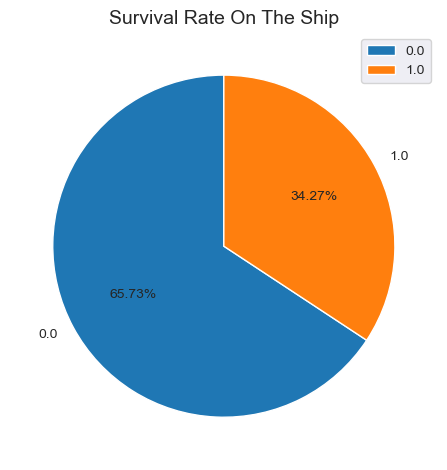

In [ ]:
plt.pie(x=df["survived"].value_counts(), autopct="%.2f%%", startangle=90, labels=df["survived"].value_counts().index)
plt.legend()
plt.title(label="Survival rate on the ship".title(), fontsize=14)
plt.tight_layout()
plt.show()

**Survival rate between men and woman**

sex
female    0.675749
male      0.184176
Name: survived, dtype: float64


<Axes: xlabel='sex', ylabel='survived'>

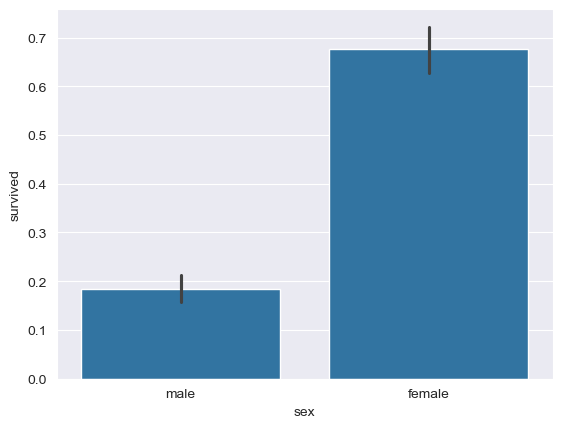

In [ ]:
survived_gender = df.groupby("sex")["survived"].mean()
print(survived_gender)

sns.barplot(x=df["sex"], y=df["survived"])

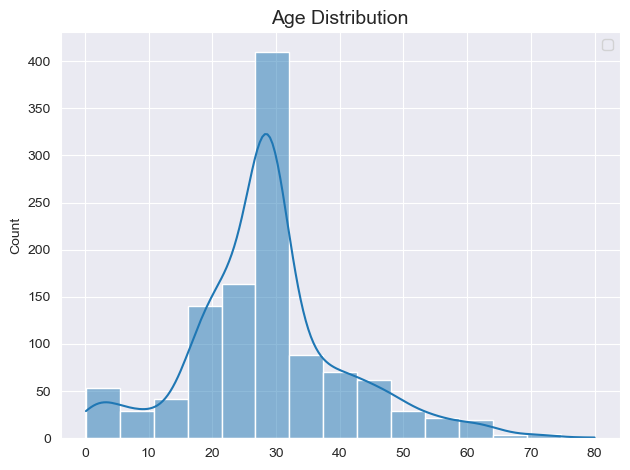

In [ ]:
sns.histplot(df[["age"]], kde=True, bins=15)
plt.legend()
plt.title(label="age distribution".title(), fontsize=14)
plt.tight_layout()
plt.show()

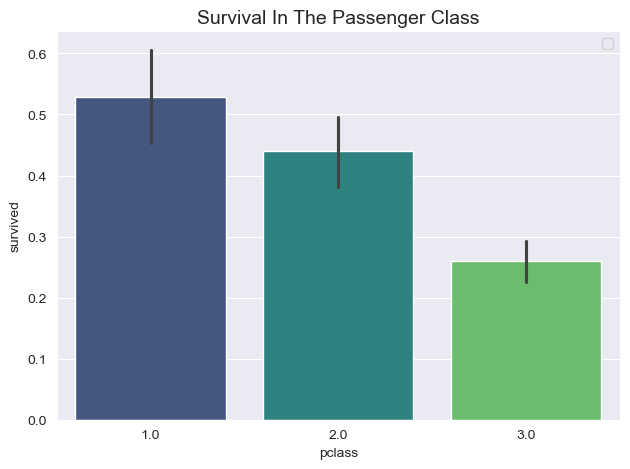

In [ ]:
sns.barplot(x=df["pclass"], y=df["survived"], palette="viridis")
plt.legend()
plt.title(label="survival in the passenger class".title(), fontsize=14)
plt.tight_layout()
plt.show()

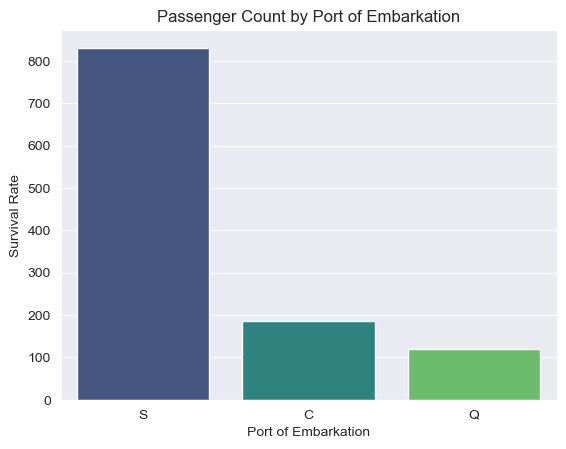

In [ ]:
sns.barplot(y=df["embarked"].value_counts(), x=df["embarked"].value_counts().index, palette="viridis")
plt.title(label='Passenger Count by Port of Embarkation')
plt.xlabel(xlabel='Port of Embarkation')
plt.ylabel(ylabel='Survival Rate')
plt.show()

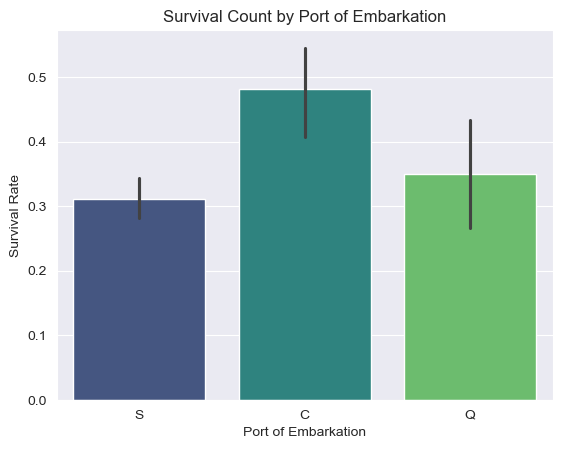

In [ ]:
sns.barplot(x=df["embarked"],y=df["survived"], palette="viridis")
plt.title(label='Survival Count by Port of Embarkation')
plt.xlabel(xlabel='Port of Embarkation')
plt.ylabel(ylabel='Survival Rate')
plt.show()

In [ ]:
scaler = StandardScaler()
df[["age", "fare"]] = scaler.fit_transform(df[["age", "fare"]])
df

deleted_columns = ["name", "sex", "embarked", "ticket"]
df.drop(columns=deleted_columns, inplace=True)
df

,pclass,survived,female,male,age,sibsp,parch,fare,EMB__C,EMB__Q,EMB__S
5,1.0,1.0,0,1,1.562833,0.0,0.0,0.620196,0,0,1
7,1.0,0.0,0,1,0.832540,0.0,0.0,-1.300202,0,0,1
8,1.0,1.0,1,0,1.968552,2.0,0.0,2.423416,0,0,1
9,1.0,0.0,0,1,3.429139,0.0,0.0,2.280200,1,0,0
14,1.0,1.0,0,1,4.159433,0.0,0.0,0.869739,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,1,0,-1.155482,1.0,0.0,-0.255014,1,0,0
1305,3.0,0.0,1,0,0.000005,1.0,0.0,-0.255014,1,0,0
1306,3.0,0.0,0,1,-0.181757,0.0,0.0,-0.777969,1,0,0
1307,3.0,0.0,0,1,-0.141185,0.0,0.0,-0.777969,1,0,0


In [ ]:
df.columns

Index(['pclass', 'survived', 'female', 'male', 'age', 'sibsp', 'parch', 'fare',
       'EMB__C', 'EMB__Q', 'EMB__S'],
      dtype='object')

<Axes: >

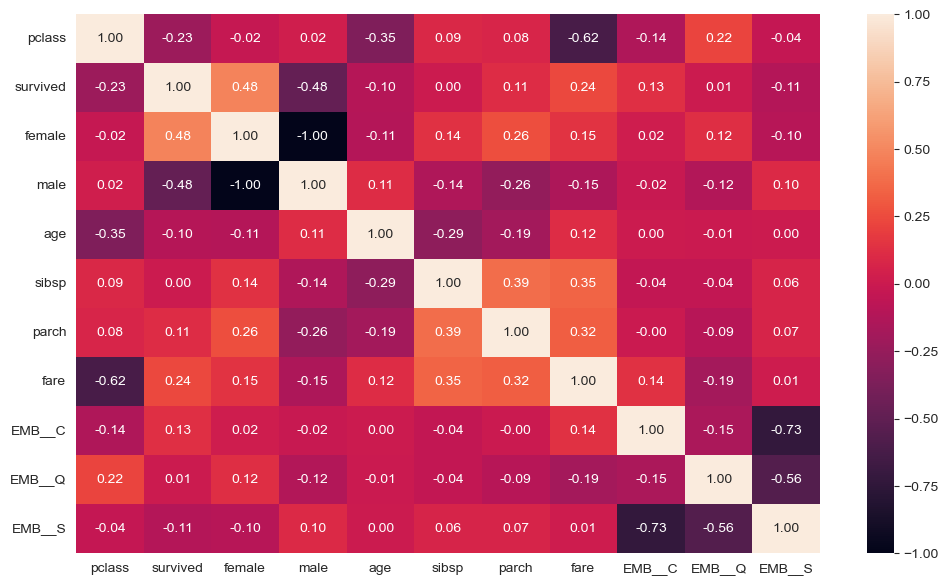

In [ ]:
plt.figure(figsize=(12,7))

sns.heatmap(df.corr(), fmt=".2f", annot=True)

In [ ]:
from tqdm.notebook import tqdm  # Import tqdm for progress bar

df2 = df.copy()

scaler = StandardScaler()
df2[["age", "fare"]] = scaler.fit_transform(df2[["age", "fare"]])

X = df2.drop(labels="survived", axis=1)
y = df2["survived"]

model_algorithms = {
    "BaggingClassifier": {
        "model": BaggingClassifier(),
        "params": {
            "estimator": [None, RandomForestClassifier()],
            "n_estimators": [100],
            "max_samples": [0.8, 0.75],
            "random_state": [11, 43]
        }
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(),
        "params": {
            "estimator": [None, ExtraTreesClassifier(), DecisionTreeClassifier()],
            "n_estimators": [100],
            "learning_rate": [0.1, 0.03, 0.01],
            "algorithm": ["SAMME"]
        }
    }
}

# Initialize an empty list to store results
result_cv = []

# Loop through each model and perform GridSearchCV with progress tracking
for model_name, mp in tqdm(model_algorithms.items(), desc="GridSearch Progress", unit="task"):
    gs = GridSearchCV(
        estimator=mp["model"], 
        param_grid=mp["params"],
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=43), 
        return_train_score=False, 
        n_jobs=-1
    )
    
    # Fit the model and append the results
    gs.fit(X, y)
    
    # Append cross-validation results to result_cv
    temp_df = pd.DataFrame(gs.cv_results_)
    temp_df["model"] = model_name  # Add model name to the results
    result_cv.append(temp_df)

# Combine all the results into a single DataFrame
final_results = pd.concat(result_cv, ignore_index=True)

# Display the final results
final_results


GridSearch Progress:   0%|          | 0/2 [00:00<?, ?task/s]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_max_samples,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,model,param_algorithm,param_learning_rate
0,0.455262,0.011644,0.023855,0.001621,None,0.80,100,11.0,"{'estimator': None, 'max_samples': 0.8, 'n_est...",0.750000,0.802632,0.793860,0.792952,0.806167,0.789122,0.020202,7,BaggingClassifier,NaN,NaN
1,0.449353,0.009756,0.025569,0.001380,None,0.80,100,43.0,"{'estimator': None, 'max_samples': 0.8, 'n_est...",0.763158,0.802632,0.789474,0.810573,0.819383,0.797044,0.019590,2,BaggingClassifier,NaN,NaN
2,0.472867,0.027572,0.027367,0.002963,None,0.75,100,11.0,"{'estimator': None, 'max_samples': 0.75, 'n_es...",0.750000,0.798246,0.802632,0.788546,0.797357,0.787356,0.019229,8,BaggingClassifier,NaN,NaN
3,0.474561,0.036034,0.022848,0.000402,None,0.75,100,43.0,"{'estimator': None, 'max_samples': 0.75, 'n_es...",0.754386,0.807018,0.811404,0.810573,0.823789,0.801434,0.024196,1,BaggingClassifier,NaN,NaN
4,27.319650,0.541603,1.103527,0.028247,RandomForestClassifier(),0.80,100,11.0,"{'estimator': RandomForestClassifier(), 'max_s...",0.750000,0.824561,0.793860,0.766520,0.828194,0.792627,0.030935,6,BaggingClassifier,NaN,NaN
5,27.852198,0.805884,1.073768,0.073024,RandomForestClassifier(),0.80,100,43.0,"{'estimator': RandomForestClassifier(), 'max_s...",0.771930,0.815789,0.793860,0.779736,0.823789,0.797021,0.020035,3,BaggingClassifier,NaN,NaN
6,28.189179,0.742126,1.036209,0.043245,RandomForestClassifier(),0.75,100,11.0,"{'estimator': RandomForestClassifier(), 'max_s...",0.763158,0.815789,0.793860,0.770925,0.828194,0.794385,0.025008,5,BaggingClassifier,NaN,NaN
7,21.620379,3.133770,0.739848,0.167449,RandomForestClassifier(),0.75,100,43.0,"{'estimator': RandomForestClassifier(), 'max_s...",0.771930,0.811404,0.798246,0.775330,0.823789,0.796140,0.020105,4,BaggingClassifier,NaN,NaN
8,0.312825,0.072434,0.022536,0.003137,None,NaN,100,NaN,"{'algorithm': 'SAMME', 'estimator': None, 'lea...",0.723684,0.824561,0.780702,0.762115,0.779736,0.774160,0.032579,1,AdaBoost,SAMME,0.10
9,0.400179,0.099163,0.022161,0.001403,None,NaN,100,NaN,"{'algorithm': 'SAMME', 'estimator': None, 'lea...",0.723684,0.824561,0.767544,0.757709,0.779736,0.770647,0.032778,3,AdaBoost,SAMME,0.03


## using decision tree classifier and decision tree regressor
**as missing data imputer**

In [ ]:
df1.isna().sum()
df1.drop(columns=["cabin", "boat","body", "home.dest"], inplace=True)
df1.drop(labels="name", axis=1, inplace=True)
df1.drop(columns="ticket", inplace=True)
df1.isna().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [ ]:
df1["embarked"].value_counts()

embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [ ]:
# data preprocessing to handle missing data (numeric and category)
fare_mean = df1["fare"].mean()
emb_mode = df1["embarked"].mode()[0]

df1["fare"].replace(to_replace=np.nan, value=fare_mean, inplace=True)
df1["embarked"].replace(to_replace=np.nan, value=emb_mode, inplace=True)

emb: DataFrame = pd.get_dummies(data=df1["embarked"], prefix="EMB_").astype(dtype=np.int64)
gender: DataFrame = pd.get_dummies(data=df1["sex"]).astype(dtype=np.int64)

df1: DataFrame  = pd.concat(objs=[df1.iloc[:,:2], gender, df1.iloc[:,3:7], emb], axis=1)

# choosing the column to be imputed
missing_data: DataFrame  = df1[df1["age"].isna()] 
not_missing_data: DataFrame  = df1[df1["age"].notna()]

X_train: DataFrame  = not_missing_data.drop(labels="age", axis=1)
y_train: Series  = not_missing_data["age"]
x_test: DataFrame  = missing_data.drop(labels="age", axis=1)

# train the data using decision tree and predict the missing data (decision tree imputer)
regressor_tree = DecisionTreeRegressor()
regressor_tree.fit(X=X_train, y=y_train)
missing_data["age"] = regressor_tree.predict(X=x_test)
df1: DataFrame = pd.concat(objs=[missing_data, not_missing_data]).reset_index(drop=True)

# Initialize the scaler
scaled = StandardScaler()

# Select the columns you want to scale
columns_to_scale: list[str] = ["age", "fare"]

# Apply the scaler to the selected columns and replace them in df1
df1[columns_to_scale] = scaled.fit_transform(X=df1[columns_to_scale])

df1

,pclass,survived,female,male,age,sibsp,parch,fare,EMB__C,EMB__Q,EMB__S
0,1.0,0.0,0,1,1.307083,0.0,0.0,-0.142510,0,0,1
1,1.0,1.0,0,1,0.826779,0.0,0.0,-0.130425,0,0,1
2,1.0,0.0,0,1,0.448358,0.0,0.0,0.121899,1,0,0
3,1.0,0.0,0,1,1.321638,0.0,0.0,-0.044384,0,0,1
4,1.0,1.0,1,0,1.030545,0.0,0.0,-0.107788,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,0,1,1.139705,0.0,0.0,-0.504078,1,0,0
1305,3.0,0.0,1,0,-1.116268,1.0,0.0,-0.364300,1,0,0
1306,3.0,0.0,0,1,-0.242988,0.0,0.0,-0.504078,1,0,0
1307,3.0,0.0,0,1,-0.206601,0.0,0.0,-0.504078,1,0,0


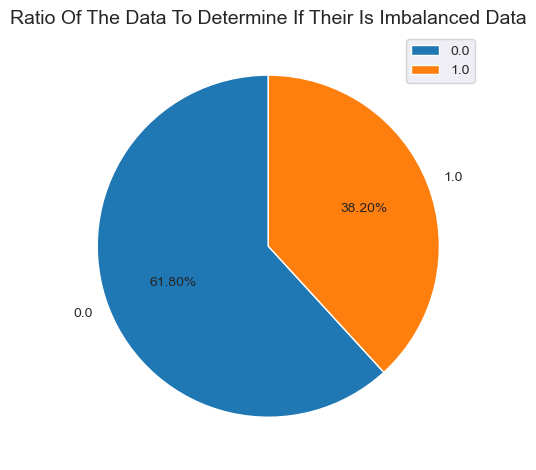

In [ ]:
plt.pie(x=df1["survived"].value_counts(), autopct="%.2f%%", labels=df1["survived"].value_counts().index, startangle=90)
plt.legend()
plt.title(label="ratio of the data to determine if their is imbalanced data".title(), fontsize=14)
plt.tight_layout()
plt.show()

## play with imbalanced data and evaluate it 

In [ ]:
X = df1.drop(labels="survived", axis=1)
y = df1["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)

cvr = GridSearchCV(
    estimator=SVC(),
    param_grid={
        "C": [1, 10, 20, 30],
        "gamma": ["auto", "scale"],
        "kernel":['linear', 'poly', 'rbf', 'sigmoid']
    },
    cv=skf,
    return_train_score=False
)
cvr.fit(X=X,y=y)
cvr_df = pd.DataFrame(data=cvr.cv_results_)

cvr_df = cvr_df.loc[:, ["param_C", "param_gamma", "param_kernel", "mean_test_score"]]
cvr_df["test_percent"] = np.round(a=cvr_df["mean_test_score"] * 100, decimals=2)
cvr_df.sort_values(by="test_percent", ascending=False, inplace=True)
cvr_df[:5]

,param_C,param_gamma,param_kernel,mean_test_score,test_percent
13,10,scale,poly,0.817443,81.74
1,1,auto,poly,0.814390,81.44
5,1,scale,poly,0.813626,81.36
6,1,scale,rbf,0.812860,81.29
9,10,auto,poly,0.812851,81.29


In [ ]:
print(cvr.best_params_)
print(cvr.best_score_)

{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.8174431868035448


from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier

In [ ]:
k = np.int64(np.floor(np.sqrt(len(df1))))
n_estimator = k if k % 2 != 0 else k - 1

model_parameters = {
    "BaggingClassifier": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [n_estimator, 5, 11, 51, 45],
            "weights": ["distance", "uniform"]
        }
    },
    "LogisticRegression": {
        "model": LogisticRegression(),
        "params": {
            "penalty": ['l1', 'l2', 'elasticnet', 'none'],
            "C": [0.001, 0.01, 0.1, 1, 10, 100],
            "solver": ['lbfgs', 'liblinear', 'saga'],
            "max_iter": [100, 200, 300],
            "class_weight": [None, 'balanced']
        }
    },
    "BaggingClassifier_forest" : {
        "model" : BaggingClassifier(),
        "params": {
            "estimator": [None, RandomForestClassifier()],
            "n_estimators" : [10, 50, 100],
            "oob_score": [True],
            "max_samples": [0.8, 0.85, 0.7],
            "random_state": [1, 42, 11]
        }
    },
    "RandomForestClassifier" : {
        "model" : RandomForestClassifier(),
        "params" : {
            "n_estimators": [100, 50 , 25],
            "criterion": ['gini', 'entropy', 'log_loss'],
            "max_features": ['sqrt', 'log2'],
            "bootstrap" : [True, False],
            "oob_score" : [True],
            "class_weight": ['balanced', 'balanced_subsample', None],
        }
    }
}

grid_scores_details = []

for model, mp in model_parameters.items():
    grid_search = GridSearchCV(estimator=mp["model"], param_grid=mp["params"], cv=skf, return_train_score=False)
    grid_search.fit(X=X, y=y)
    grid_scores_details.append({
        "Model" : model,
        "best parameters" : grid_search.best_params_,
        "best score" : grid_search.best_score_,
    })
pd.DataFrame(data=grid_scores_details, columns=["Model", "best parameters", "best score"])

,Model,best parameters,best score
0,BaggingClassifier,"{'n_neighbors': 11, 'weights': 'uniform'}",0.808259
1,LogisticRegression,"{'C': 0.1, 'class_weight': None, 'max_iter': 1...",0.799871
2,BaggingClassifier_forest,"{'estimator': RandomForestClassifier(), 'max_s...",0.831953
3,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.826589


In [ ]:
model_parameters

{'BaggingClassifier': {'model': KNeighborsClassifier(),
  'params': {'n_neighbors': [np.int64(35), 5, 11, 51, 45],
   'weights': ['distance', 'uniform']}},
 'LogisticRegression': {'model': LogisticRegression(),
  'params': {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
   'C': [0.001, 0.01, 0.1, 1, 10, 100],
   'solver': ['lbfgs', 'liblinear', 'saga'],
   'max_iter': [100, 200, 300],
   'class_weight': [None, 'balanced']}},
 'BaggingClassifier_forest': {'model': BaggingClassifier(),
  'params': {'estimator': [None, RandomForestClassifier()],
   'n_estimators': [10, 50, 100],
   'oob_score': [True],
   'max_samples': [0.8, 0.85, 0.7],
   'random_state': [1, 42, 11]}},
 'RandomForestClassifier': {'model': RandomForestClassifier(),
  'params': {'n_estimators': [100, 50, 25],
   'criterion': ['gini', 'entropy', 'log_loss'],
   'max_features': ['sqrt', 'log2'],
   'bootstrap': [True, False],
   'oob_score': [True],
   'class_weight': ['balanced', 'balanced_subsample', None]}}}